# Features and prediction

**Realizar una exploración visual.** 
<br/>

* ¿Es relevante el género para el abandono? (es decir, ¿hay más
probabilidades de que abandone siendo de algún género en particular?). 
* ¿Si es un senior citizen? 
* ¿El método de pago?

<hr/>

In [2]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.close("all")

import seaborn as sns

In [3]:
df_churn = pd.read_csv('../data/preprocessed/churn_preprocessed.csv')

In [4]:
df_churn.sample(5)

,Unnamed: 0.1,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1998,1998,1998,7615-ESMYF,Female,0,Yes,No,2.0,No,NaN,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,44.60,97.1,Yes
2044,2044,2044,2550-QHZGP,Male,0,No,No,7.0,Yes,NaN,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,128.6,No
3743,3743,3743,2391-SOORI,Male,0,No,Yes,4.0,Yes,No,...,No,No,No,No,Month-to-month,No,Electronic check,49.35,219.65,Yes
3008,3008,3008,8084-OIVBS,Female,0,No,No,11.0,Yes,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.00,211.95,No
5399,5399,5399,2589-AYCRP,Female,0,No,No,50.0,Yes,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.75,989.05,No


<hr/>

In [5]:
gender = pd.DataFrame(df_churn.groupby(['gender', 'Churn'])['Churn'].agg(['count'])).reset_index()
SeniorCitizen = pd.DataFrame(df_churn.groupby(['SeniorCitizen','Churn'])['Churn'].agg(['count'])).reset_index()
PaymentMethod = pd.DataFrame(df_churn.groupby(['PaymentMethod','Churn'])['Churn'].agg(['count'])).reset_index()

### Gender insight

 ¿Es relevante el género para el abandono?
 <br/>
 
 Plot analysis 

In [6]:
gender = gender.rename(columns={'Churn':'churn','count': 'amount'})
gender

,gender,churn,amount
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


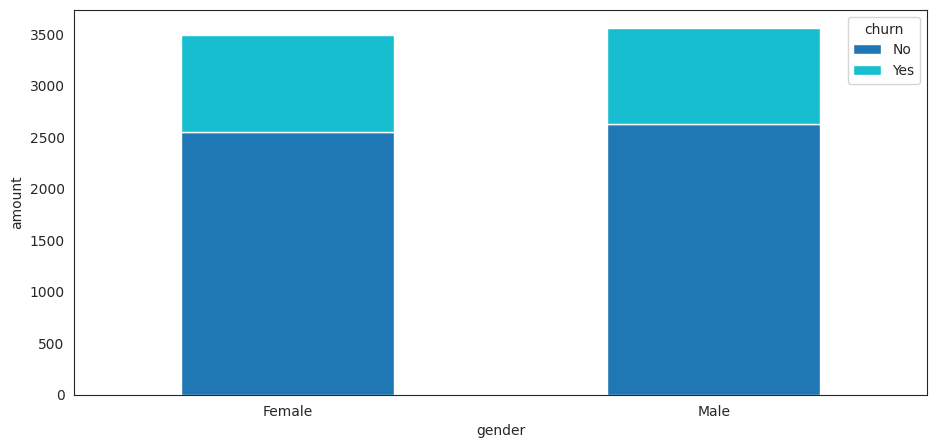

In [217]:
sns.set_style('white')
(gender
    .groupby(['gender', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');

### SeniorCitizen insight

Plot analysis shows that [SeniorCitizen = 1] has similar proportions between Churn (yes/no), It means that being a SeniorCitizen doesn't relate to an specific Churn condition.
<br/>

**In the opposite, [SeriorCitizen = 0] gives us more chances of having [Churn = No].**

In [205]:
SeniorCitizen = SeniorCitizen.rename(columns={'Churn':'churn','count': 'amount'})
SeniorCitizen

,SeniorCitizen,churn,amount
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


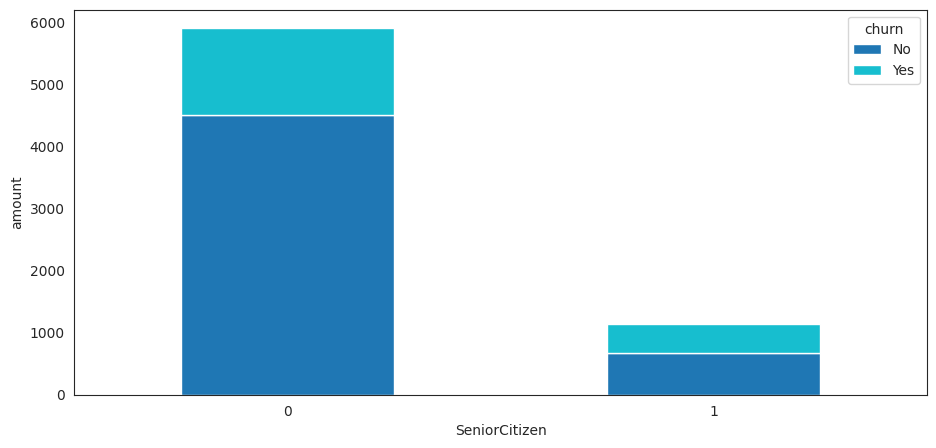

In [215]:
sns.set_style('white')
(SeniorCitizen
    .groupby(['SeniorCitizen', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');

### PaymentMethod insight

There is more [Churn = Yes] probability if the client has **Electronic check** as payment method.

In [208]:
PaymentMethod = PaymentMethod.rename(columns={'Churn':'churn','count': 'amount'})
PaymentMethod

,PaymentMethod,churn,amount
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


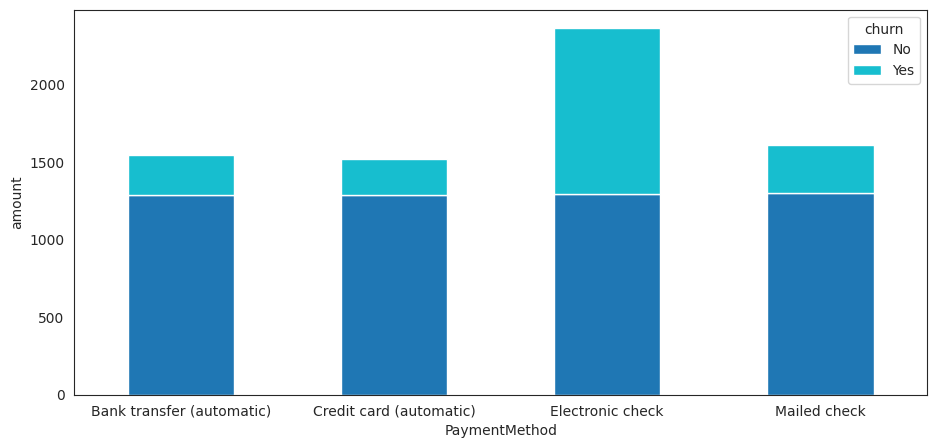

In [216]:
sns.set_style('white')
(PaymentMethod
    .groupby(['PaymentMethod', 'churn'])
    .amount
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.5, figsize=(11, 5))

plt.xticks(rotation=0)
plt.ylabel('amount');